In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.metrics import confusion_matrix
import seaborn as sns

np.random.seed(0)

# Data

In [3]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 11s 1us/step


In [4]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


# Visualizando os exemplos

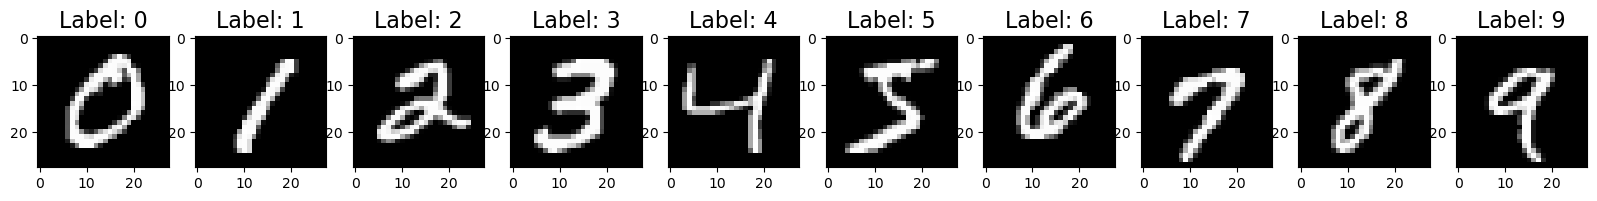

In [5]:
num_classes = 10
f, ax = plt.subplots(1, num_classes, figsize=(20,20))

for i in range(0, num_classes):
  sample = x_train[y_train == i][0]
  ax[i].imshow(sample, cmap='gray')
  ax[i].set_title("Label: {}".format(i), fontsize=16)

In [6]:
for i in range(10):
  print(y_train[i])

5
0
4
1
9
2
1
3
1
4


In [7]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [23]:
#  imprimindo os rótulos das 10 primeiras imagens
for i in range(10):
  print(y_train[i])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


# Preparando os Dados

In [9]:
#  normalizando os valores dos pixels nas imagens
x_train = x_train / 255.0
x_test = x_test / 255.0

In [10]:
# remodelando as imagens no conjunto de treinamento
x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)
print(x_train.shape)

(60000, 784)


# Criando o Modelo

In [11]:
#  definindo um modelo de rede neural sequencial
model = Sequential()

model.add(Dense(units=128, input_shape=(784,), activation='relu'))
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(units=10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 118282 (462.04 KB)
Trainable params: 118282 (462.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# Treino

In [12]:
# treinando o modelo
batch_size = 512
epochs=10
model.fit(x=x_train, y=y_train, batch_size=batch_size, epochs=epochs)

Epoch 1/10


118/118 [==============================] - 28s 13ms/step - loss: 0.5897 - accuracy: 0.8299
Epoch 2/10
118/118 [==============================] - 1s 10ms/step - loss: 0.2215 - accuracy: 0.9355
Epoch 3/10
118/118 [==============================] - 1s 10ms/step - loss: 0.1634 - accuracy: 0.9524
Epoch 4/10
118/118 [==============================] - 1s 10ms/step - loss: 0.1288 - accuracy: 0.9619
Epoch 5/10
118/118 [==============================] - 1s 10ms/step - loss: 0.1035 - accuracy: 0.9690
Epoch 6/10
118/118 [==============================] - 1s 9ms/step - loss: 0.0894 - accuracy: 0.9739
Epoch 7/10
118/118 [==============================] - 1s 9ms/step - loss: 0.0763 - accuracy: 0.9773
Epoch 8/10
118/118 [==============================] - 1s 9ms/step - loss: 0.0645 - accuracy: 0.9806
Epoch 9/10
118/118 [==============================] - 1s 9ms/step - loss: 0.0567 - accuracy: 0.9827
Epoch 10/10
118/118 [==============================] - 1s 9ms/step - loss: 0.0503 - accuracy

# Avaliando

In [13]:
#  avaliando o desempenho do modelo
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test Loss: {}, Test Accuracy: {}".format(test_loss, test_acc))

313/313 [==============================] - 2s 3ms/step - loss: 0.0748 - accuracy: 0.9763
Test Loss: 0.07480224967002869, Test Accuracy: 0.9763000011444092


In [14]:
# probabilidades associadas a cada classe para cada amostra 
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
print(y_pred)
print(y_pred_classes)

313/313 [==============================] - 1s 3ms/step
[[2.3065381e-07 1.9357941e-07 2.1237684e-05 ... 9.9993014e-01
  3.2416139e-07 5.4090046e-06]
 [4.2847505e-06 3.6392658e-04 9.9931514e-01 ... 2.0696199e-08
  1.6777899e-06 1.5983747e-09]
 [5.0908125e-06 9.9887329e-01 1.8560879e-04 ... 3.8929188e-04
  3.2562375e-04 1.4360589e-05]
 ...
 [9.0000563e-11 3.6122208e-10 7.6563599e-12 ... 1.8253477e-06
  9.1503951e-09 7.4401419e-07]
 [5.5599214e-09 1.0449696e-08 3.7482054e-10 ... 5.6612603e-09
  4.4341999e-04 1.0372649e-08]
 [1.1240153e-06 1.5339267e-10 4.5055518e-08 ... 2.7016784e-13
  7.4415407e-09 6.7931336e-09]]
[7 2 1 ... 4 5 6]


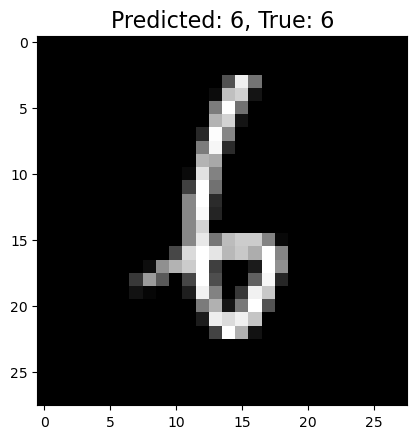

In [15]:
# visualizar aleatoriamente uma amostra do conjunto de teste
random_idx = np.random.choice(len(x_test))
x_sample = x_test[random_idx]
y_true = np.argmax(y_test, axis=1)
y_sample_true = y_true[random_idx]
y_sample_pred_class = y_pred_classes[random_idx]

plt.title("Predicted: {}, True: {}".format(y_sample_pred_class, y_sample_true), fontsize=16)
plt.imshow(x_sample.reshape(28, 28), cmap='gray')

# Matrix de Confusão

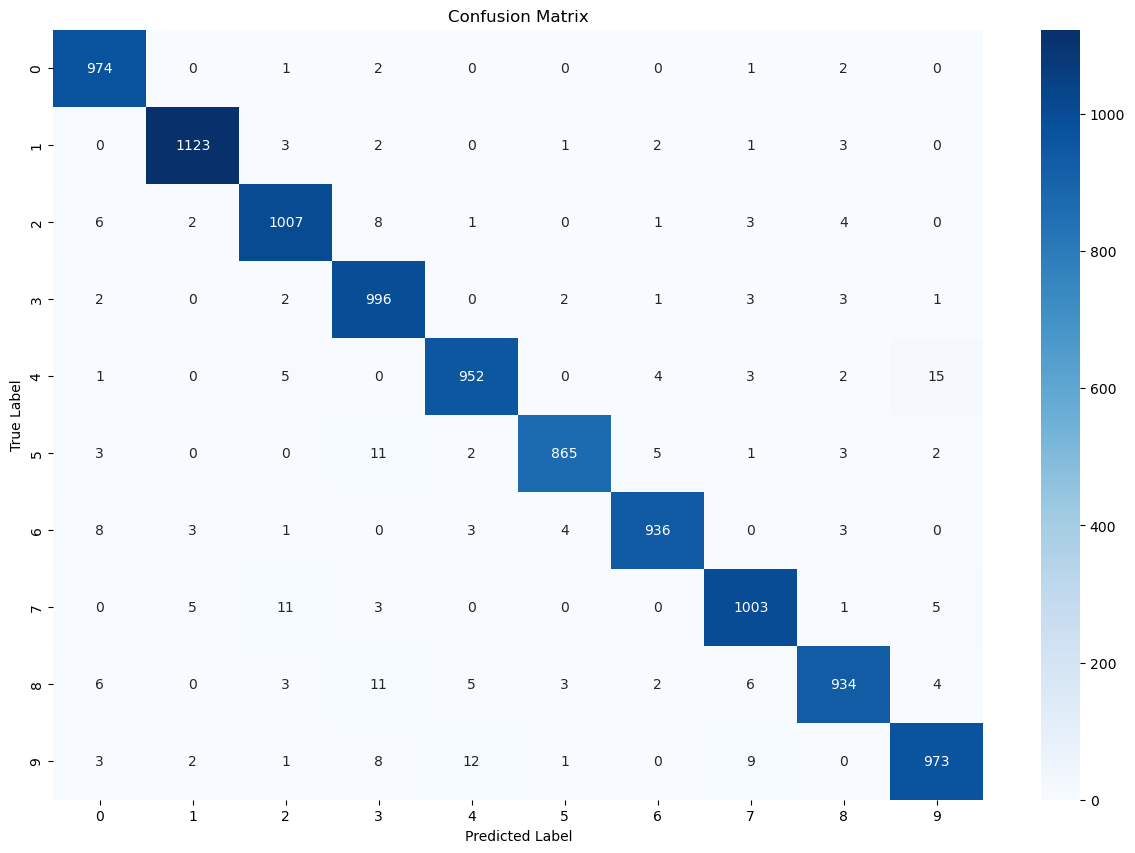

In [16]:
confusion_mtx = confusion_matrix(y_true, y_pred_classes)

# Plot
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(confusion_mtx, annot=True, fmt='d', ax=ax, cmap="Blues")
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
ax.set_title('Confusion Matrix');

# Analisando os erros

In [17]:
# informações sobre as amostras que o modelo classificou incorretamente
errors = (y_pred_classes - y_true != 0)
y_pred_classes_errors = y_pred_classes[errors]
y_pred_errors = y_pred[errors]
y_true_errors = y_true[errors]
x_test_errors = x_test[errors]

In [18]:
#  entendendo se uma amostra foi classificada incorretamente, e também quão confiante está
y_pred_errors_probability = np.max(y_pred_errors, axis=1)
true_probability_errors = np.diagonal(np.take(y_pred_errors, y_true_errors, axis=1))
diff_errors_pred_true = y_pred_errors_probability - true_probability_errors

#  identificando e visualizando amostras que o modelo classificou incorretamente
sorted_idx_diff_errors = np.argsort(diff_errors_pred_true)
top_idx_diff_errors = sorted_idx_diff_errors[-5:] 

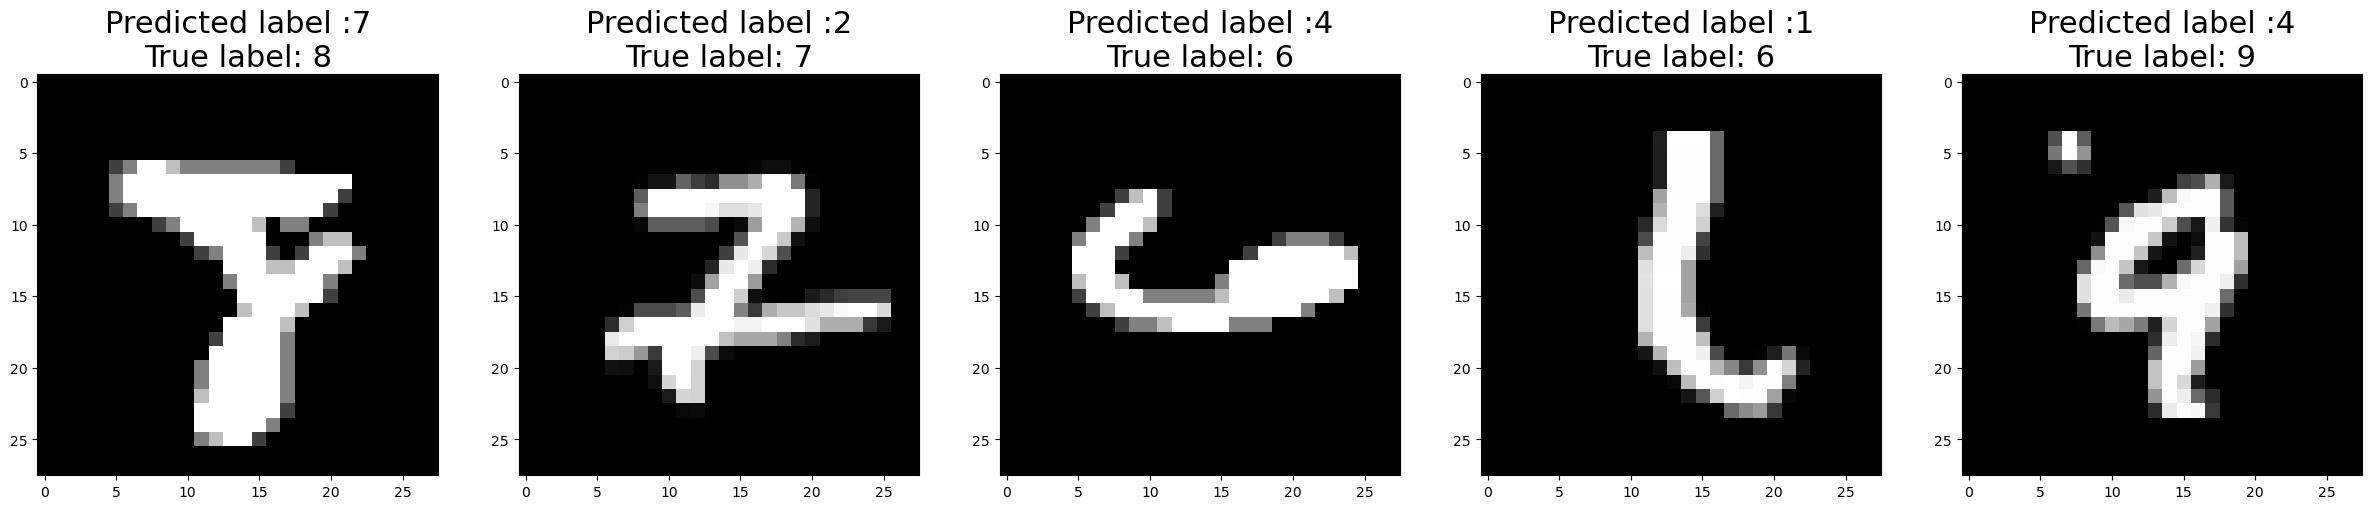

In [22]:
# inspecionando visualmente algumas das imagens que foram classificadas incorretamente pelo modelo
num = len(top_idx_diff_errors)
f, ax = plt.subplots(1, num, figsize=(30,30))

for i in range(0, num):
  idx = top_idx_diff_errors[i]
  sample = x_test_errors[idx].reshape(28,28)
  y_t = y_true_errors[idx]
  y_p = y_pred_classes_errors[idx]
  ax[i].imshow(sample, cmap='gray')
  ax[i].set_title("Predicted label :{}\nTrue label: {}".format(y_p, y_t), fontsize=22)
     